In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [3]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [4]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [5]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역(150),승차,234.0
1,2008-01-01,150.0,서울역(150),승차,-420.0
2,2008-01-01,150.0,서울역(150),승차,-318.0
3,2008-01-01,150.0,서울역(150),승차,-161.0
4,2008-01-01,150.0,서울역(150),승차,-205.0
5,2008-01-01,150.0,서울역(150),승차,13.0
6,2008-01-01,150.0,서울역(150),승차,538.0
7,2008-01-01,150.0,서울역(150),승차,632.0
8,2008-01-01,150.0,서울역(150),승차,604.0
9,2008-01-01,150.0,서울역(150),승차,808.0


In [56]:
import re
for text in df['name'] : 
    pattern = re.compile(r'\(\w*\)')
    text = re.sub(pattern, '', text)

In [63]:
df.name.str.replace(r'\(\w*\)', '')

In [55]:
import re

for i in df['name']:
    i = re.match('^[가-힣]*$', i)

In [60]:
for i in df.name:
    i = 'test'

In [64]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역,승차,234.0
1,2008-01-01,150.0,서울역,승차,-420.0
2,2008-01-01,150.0,서울역,승차,-318.0
3,2008-01-01,150.0,서울역,승차,-161.0
4,2008-01-01,150.0,서울역,승차,-205.0
5,2008-01-01,150.0,서울역,승차,13.0
6,2008-01-01,150.0,서울역,승차,538.0
7,2008-01-01,150.0,서울역,승차,632.0
8,2008-01-01,150.0,서울역,승차,604.0
9,2008-01-01,150.0,서울역,승차,808.0


In [65]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [66]:
df['name']

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
19220330     수진
19220331     수진
19220332     수진
19220333     수진
19220334     수진
19220335     수진
19220336     수진
19220337     수진
19220338     수진
19220339     수진
19220340     모란
19220341     모란
19220342     모란
19220343     모란
19220344     모란
19220345     모란
19220346     모란
19220347     모란
19220348     모란
19220349     모란
19220350     모란
19220351     모란
19220352     모란
19220353     모란
19220354     모란
19220355     모란
19220356     모란
19220357     모란
19220358     모란
19220359     모란
Name: name, Length: 1922

In [8]:
s = df['name']
s

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [9]:
s = list(sorted(set(s)))
s

['가락시장(340)',
 '가락시장(8)',
 '가산디지털단지(7)',
 '강남(222)',
 '강남구청',
 '강동',
 '강동구청',
 '강변(214)',
 '개롱',
 '개화산',
 '거여',
 '건대입구(212)',
 '건대입구(7)',
 '경복궁(317)',
 '경찰병원(341)',
 '고덕',
 '고려대',
 '고속터미널(329)',
 '고속터미널(7)',
 '공덕(5)',
 '공덕(6)',
 '공릉',
 '광나루',
 '광명사거리',
 '광화문',
 '광흥창',
 '교대(223)',
 '교대(330)',
 '구로디지털단지(232)',
 '구산',
 '구의(213)',
 '구파발(310)',
 '군자(5)',
 '군자(7)',
 '굴포천',
 '굽은다리',
 '금호(324)',
 '길동',
 '길음(417)',
 '김포공항(5)',
 '까치산(5)',
 '까치울',
 '낙성대(227)',
 '남구로',
 '남부터미널(331)',
 '남성',
 '남태령(434)',
 '남한산성입구',
 '내방',
 '노원(411)',
 '노원(7)',
 '녹번(313)',
 '녹사평',
 '논현',
 '단대오거리',
 '답십리',
 '당고개(409)',
 '당산(237)',
 '대림(233)',
 '대림(7)',
 '대청(337)',
 '대치(335)',
 '대흥',
 '도곡(334)',
 '도림천(247)',
 '도봉산(7)',
 '독립문(316)',
 '독바위',
 '돌곶이',
 '동대문(155)',
 '동대문(421)',
 '동대문역사문화공원(205)',
 '동대문역사문화공원(422)',
 '동대문역사문화공원5',
 '동대문운동장(205)',
 '동대문운동장(422)',
 '동대입구(322)',
 '동묘앞(159)',
 '동묘앞(6)',
 '동작(431)',
 '둔촌동',
 '디지털미디어시티(6)',
 '뚝섬(210)',
 '뚝섬유원지',
 '마곡',
 '마들',
 '마장',
 '마천',
 '마포',
 '마포구청',
 '망원',
 '매봉(333)',
 '먹골'

In [10]:
len(s)

284

In [11]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 7

In [12]:
s[1]

'가락시장(8)'

In [13]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [14]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [15]:
data1 = df[df['name']=='강남(222)']
data1

,date,number,name,div,a
620,2008-01-01,222.0,강남(222),승차,945.0
621,2008-01-01,222.0,강남(222),승차,314.0
622,2008-01-01,222.0,강남(222),승차,-64.0
623,2008-01-01,222.0,강남(222),승차,-205.0
624,2008-01-01,222.0,강남(222),승차,-806.0
625,2008-01-01,222.0,강남(222),승차,-405.0
626,2008-01-01,222.0,강남(222),승차,-336.0
627,2008-01-01,222.0,강남(222),승차,-474.0
628,2008-01-01,222.0,강남(222),승차,-628.0
629,2008-01-01,222.0,강남(222),승차,-584.0


In [16]:
name = data1.iloc[:1,2,]
name

620    강남(222)
Name: name, dtype: object

In [17]:
name = name.to_string(index=False)

In [18]:
name

' 강남(222)'

In [19]:
plt.savefig(name)

<Figure size 432x288 with 0 Axes>

In [20]:
len(data1)

71220

In [21]:
data1.shape

(71220, 5)

In [22]:
data1 = df[df['name']=='강남(222)']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
p = model.predict(x_test)

from keras.models import load_model
model.save('trythis.h5')

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.clf()
print(mean_squared_error(y_test, p))

                date  number     name div        a
620       2008-01-01   222.0  강남(222)  승차    945.0
621       2008-01-01   222.0  강남(222)  승차    314.0
622       2008-01-01   222.0  강남(222)  승차    -64.0
623       2008-01-01   222.0  강남(222)  승차   -205.0
624       2008-01-01   222.0  강남(222)  승차   -806.0
625       2008-01-01   222.0  강남(222)  승차   -405.0
626       2008-01-01   222.0  강남(222)  승차   -336.0
627       2008-01-01   222.0  강남(222)  승차   -474.0
628       2008-01-01   222.0  강남(222)  승차   -628.0
629       2008-01-01   222.0  강남(222)  승차   -584.0
630       2008-01-01   222.0  강남(222)  승차   -661.0
631       2008-01-01   222.0  강남(222)  승차   -751.0
632       2008-01-01   222.0  강남(222)  승차   -839.0
633       2008-01-01   222.0  강남(222)  승차   -723.0
634       2008-01-01   222.0  강남(222)  승차   -198.0
635       2008-01-01   222.0  강남(222)  승차    800.0
636       2008-01-01   222.0  강남(222)  승차   1650.0
637       2008-01-01   222.0  강남(222)  승차   1725.0
638       2008-01-01   222.0  강

<Figure size 432x288 with 0 Axes>

In [23]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Text(0.5, 0, 'Time')

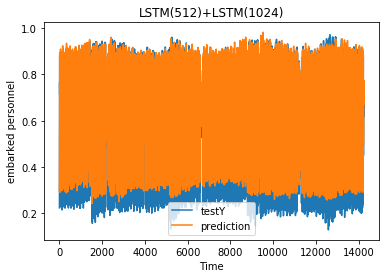

In [24]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')

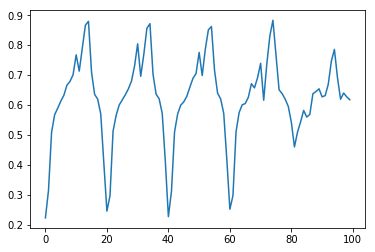

In [25]:
plt.plot(y_test[:100])

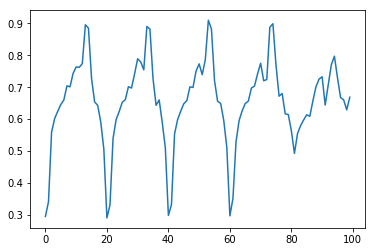

In [26]:
plt.plot(p[:100])

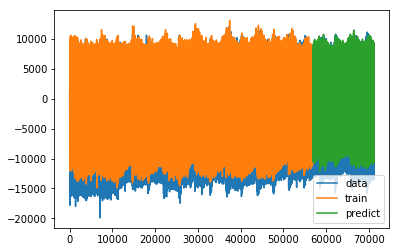

In [27]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data', 'train','predict'], loc='best')
plt.show()

In [28]:
print(y_train.shape)
print(y_test.shape)

(56969,)
(14237,)


In [29]:
yhat = y_test
yhat = yhat.reshape(len(yhat), 1, 1)

In [30]:
y = model.predict(yhat)
y

array([[-0.865764  ],
       [-0.6586534 ],
       [ 0.06325647],
       ...,
       [ 1.426758  ],
       [ 1.0229822 ],
       [ 0.63823724]], dtype=float32)

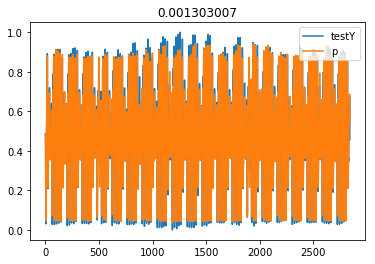

0.001303007


In [31]:
data = y

data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [32]:
t = XGBModel

D:\Anaconda3\envs\me\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[[1.1435629 ]
 [1.6136227 ]
 [1.2404175 ]
 ...
 [1.426758  ]
 [1.0229822 ]
 [0.63823724]]
(2848, 1)


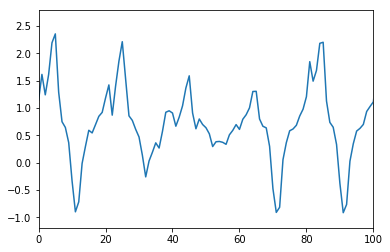

0.5546928


In [33]:
# data = y

# data = data.reshape(len(data), 1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# data = scaler.fit_transform(data)

# train_size = int(len(data) * 0.80)
# test_size = len(data) - train_size

# train = data[0:train_size]
# test = data[train_size:len(data)]
# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

x = list(range(len(y)))
x = np.reshape(x, (-1, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8, shuffle=False)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# x_train = list(range(11382*7))
# x_train = np.reshape(x_train, (11382, 7))
# x_train = list(range(11383))
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(X_train, y_train, verbose=False)

p = XGBModel.predict(X_test)
print(y_test)
print(y_test.shape)
plt.plot(y_test)
# plt.plot(p)
# plt.legend(['testY', 'p'], loc='upper right')
# plt.title(mean_squared_error(y_test, p))
plt.xlim(0, 100)
plt.show()
print(mean_squared_error(y_test, p))

Epoch 1/10


D:\Anaconda3\envs\me\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


11389/11389 [==============================] - 1s 101us/step - loss: 31461.6462
Epoch 2/10
11389/11389 [==============================] - 1s 71us/step - loss: 4932.8569
Epoch 3/10
11389/11389 [==============================] - 1s 75us/step - loss: 622.5156
Epoch 4/10
11389/11389 [==============================] - 1s 69us/step - loss: 106.4776
Epoch 5/10
11389/11389 [==============================] - 1s 71us/step - loss: 13.7092
Epoch 6/10
11389/11389 [==============================] - 1s 74us/step - loss: 1.0432
Epoch 7/10
11389/11389 [==============================] - 1s 69us/step - loss: 0.4958
Epoch 8/10
11389/11389 [==============================] - 1s 67us/step - loss: 0.4907
Epoch 9/10
11389/11389 [==============================] - 1s 68us/step - loss: 0.4910
Epoch 10/10
11389/11389 [==============================] - 1s 69us/step - loss: 0.4910


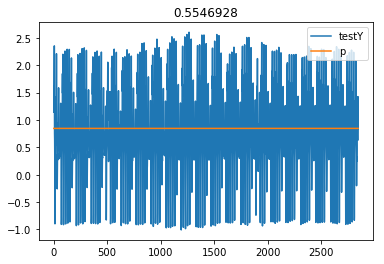

0.5546928


In [34]:
# data = y

# data = data.reshape(len(data), 1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# data = scaler.fit_transform(data)

# train_size = int(len(data) * 0.80)
# test_size = len(data) - train_size

# train = data[0:train_size]
# test = data[train_size:len(data)]
# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

x = list(range(len(y)))
x = np.reshape(x, (-1, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8, shuffle=False)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# x_train = list(range(11382*7))
# x_train = np.reshape(x_train, (11382, 7))
# x_train = list(range(11383))
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=10, batch_size=32)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.xlim(0, 100)
plt.show()
print(mean_squared_error(y_test, p))

In [35]:
ts = y_test

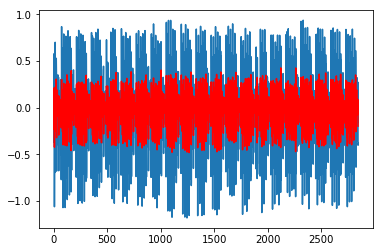

In [36]:
from statsmodels.tsa.arima_model import ARIMA
ts_log = y_test
# ts_log_diff = ts_log - ts_log.shift(-1)
ts_log_diff = ts_log - np.roll(ts_log, 1)
model = ARIMA(ts, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

(100, 2988.3)

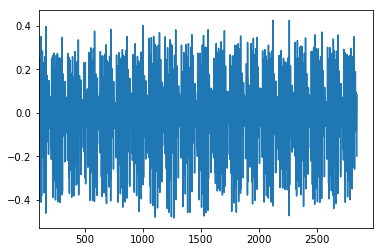

In [37]:
plt.plot(results_AR.fittedvalues)
plt.xlim(100)

In [38]:
print(len(x_train))
print(x_train.shape)
print(x_train)
print(y_train)

11382
(11382, 7)
[[0.03960378 0.09694324 0.29680708 ... 0.41181368 0.44777557 0.47865975]
 [0.09694324 0.29680708 0.37918368 ... 0.44777557 0.47865975 0.53232443]
 [0.29680708 0.37918368 0.41181368 ... 0.47865975 0.53232443 0.5530355 ]
 ...
 [0.17759022 0.0489976  0.04453743 ... 0.37251535 0.43257642 0.44341692]
 [0.0489976  0.04453743 0.29028985 ... 0.43257642 0.44341692 0.47900528]
 [0.04453743 0.29028985 0.37251535 ... 0.44341692 0.47900528 0.51824516]]
[[-0.865764  ]
 [-0.6586534 ]
 [ 0.06325647]
 ...
 [ 0.72135794]
 [ 0.86309266]
 [ 0.9106717 ]]


In [39]:
t = list(range(11382*7))
t = np.reshape(t, (11382, 7))
t
t.shape
len(t)

11382

In [40]:
p

array([0.8463099, 0.8463099, 0.8463099, ..., 0.8463099, 0.8463099,
       0.8463099], dtype=float32)

(0, 100)

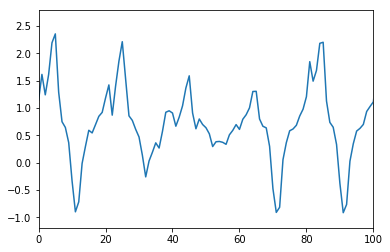

In [41]:
plt.plot(y_test)
plt.xlim(0, 100)

(0, 100)

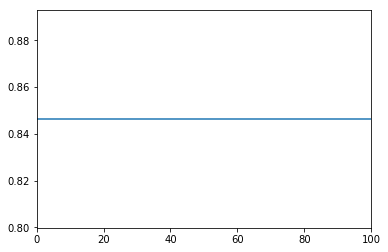

In [42]:
plt.plot(p)
plt.xlim(0, 100)

In [43]:
print(y_test[:100])

[[ 1.1435629 ]
 [ 1.6136227 ]
 [ 1.2404175 ]
 [ 1.6102057 ]
 [ 2.1906009 ]
 [ 2.3539078 ]
 [ 1.2894515 ]
 [ 0.74922824]
 [ 0.6442268 ]
 [ 0.36626855]
 [-0.33054438]
 [-0.8973398 ]
 [-0.7153841 ]
 [-0.01423118]
 [ 0.29797754]
 [ 0.5926378 ]
 [ 0.5443035 ]
 [ 0.69501555]
 [ 0.8476989 ]
 [ 0.91959035]
 [ 1.1816078 ]
 [ 1.4212829 ]
 [ 0.8692558 ]
 [ 1.3986349 ]
 [ 1.8549801 ]
 [ 2.2109916 ]
 [ 1.5291433 ]
 [ 0.85620785]
 [ 0.7730688 ]
 [ 0.61048305]
 [ 0.4703099 ]
 [ 0.13734336]
 [-0.25888935]
 [ 0.03192496]
 [ 0.1903908 ]
 [ 0.3627886 ]
 [ 0.2682202 ]
 [ 0.5708489 ]
 [ 0.9217752 ]
 [ 0.94893444]
 [ 0.90776086]
 [ 0.66700506]
 [ 0.8328706 ]
 [ 1.0391072 ]
 [ 1.3649794 ]
 [ 1.5875177 ]
 [ 0.90903413]
 [ 0.62012935]
 [ 0.7987783 ]
 [ 0.6980364 ]
 [ 0.6389415 ]
 [ 0.5284099 ]
 [ 0.29537877]
 [ 0.38288632]
 [ 0.3883868 ]
 [ 0.3724085 ]
 [ 0.3362223 ]
 [ 0.5096475 ]
 [ 0.59054244]
 [ 0.69643676]
 [ 0.608556  ]
 [ 0.7937382 ]
 [ 0.8765116 ]
 [ 1.002293  ]
 [ 1.3011965 ]
 [ 1.3046825 ]
 [ 0.79913

In [44]:
print(p[:100])

[0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099 0.8463099
 0.846

In [45]:
data = y
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# x = range(0,len(y))
x = np.arange(0, len(y))
x=x.reshape(len(x),1)

In [ ]:
print(len(x))
print(len(y))
print(x.shape)
print(y.shape)
print(type(y))
print(type(x))

In [ ]:
x=x.reshape(len(x),1)
x.shape

In [ ]:
data = y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(x_train)
plt.plot(y_train)
plt.show()

In [ ]:
plt.plot(x_train)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(p)

In [ ]:
from xgboost import XGBRegressor
# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x,y, verbose=False)

# Get the mean absolute error on the validation data :
# XGBpredictions = XGBModel.predict(val_X)
# MAE = mean_absolute_error(val_y , XGBpredictions)
# print('XGBoost validation MAE = ',MAE)

In [ ]:
from xgboost import plot_tree
plot_tree(XGBModel)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

In [ ]:
# 저장
model_json = model.to_json()
with open("s[0].json", "w") as json_file :
    json_file.write(model_json)
model.save_weights("s[0].h5")
print("Saved model to disk")

In [ ]:
# # 모델 불러오기
# from keras.models import model_from_json
# json_file = open("model1.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# model.load_weights("model1.h5")
# model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
data = y # p
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
x = np.arange(0, len(y))
x=x.reshape(len(x),1)
x = scaler.fit_transform(x)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

y_train = data[0:train_size]
y_test = data[train_size:len(data)]
x_train = x[0:train_size]
x_test = x[train_size:len(x)]
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(p)

In [ ]:
plt.plot(y_test)